In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from IPython.display import display, Image
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import os

In [2]:
# Define the path to the dataset folders
happy_folder = "dataemotions/happy"
sad_folder = "dataemotions/Sad"
angry_folder = "dataemotions/Angry"

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48, 48))  # Resize to a fixed size for the model
            images.append(img)
    return images


happy_images = load_images_from_folder(happy_folder)
sad_images = load_images_from_folder(sad_folder)
angry_images = load_images_from_folder(angry_folder)


happy_labels = [0] * len(happy_images)
sad_labels = [1] * len(sad_images)
angry_labels = [2] * len(angry_images)


X = np.array(happy_images + sad_images + angry_images)
y = np.array(happy_labels + sad_labels + angry_labels)
X = X.astype('float32') / 255.0

# One-hot encode the labels
y = to_categorical(y, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
input_shape_resnet = (224, 224, 3)
input_shape_densenet = (224, 224, 3)
input_shape_efficientnet = (224, 224, 3)

def resize_images(images, input_shape):
    resized_images = []
    for img in images:
        img_resized = cv2.resize(img, (input_shape[0], input_shape[1]))
        img_resized = np.expand_dims(img_resized, axis=-1)
        img_resized = np.repeat(img_resized, 3, axis=-1)  
        resized_images.append(img_resized)
    return np.array(resized_images)


In [4]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import SeparableConv2D


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    SeparableConv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(3, activation='softmax', kernel_regularizer=l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_train_resized = resize_images(X_train, input_shape_resnet)
X_test_resized = resize_images(X_test, input_shape_resnet)

es = EarlyStopping(monitor="val_loss", mode="min", patience=10)

history = model.fit(
    X_train_resized, y_train,
    validation_data=(X_test_resized, y_test),
    epochs=100,
    callbacks=[es]
)

model.evaluate(X_test_resized, y_test)





Epoch 1/100


19/19 [==============================] - 14s 691ms/step - loss: 3.5540 - accuracy: 0.3550 - val_loss: 2.2016 - val_accuracy: 0.2867
Epoch 2/100
19/19 [==============================] - 11s 603ms/step - loss: 1.8150 - accuracy: 0.3933 - val_loss: 1.4974 - val_accuracy: 0.4067
Epoch 3/100
19/19 [==============================] - 11s 597ms/step - loss: 1.3614 - accuracy: 0.4233 - val_loss: 1.2711 - val_accuracy: 0.4400
Epoch 4/100
19/19 [==============================] - 11s 598ms/step - loss: 1.2382 - accuracy: 0.4200 - val_loss: 1.2114 - val_accuracy: 0.4733
Epoch 5/100
19/19 [==============================] - 12s 623ms/step - loss: 1.1931 - accuracy: 0.4267 - val_loss: 1.1888 - val_accuracy: 0.3800
Epoch 6/100
19/19 [==============================] - 12s 617ms/step - loss: 1.1843 - accuracy: 0.4050 - val_loss: 1.1822 - val_accuracy: 0.3267
Epoch 7/100
19/19 [==============================] - 12s 620ms/step - loss: 1.1642 - accuracy: 0.4400 - val_loss: 1.1582 - val_accu

5/5 [==============================] - 0s 76ms/step - loss: 1.1096 - accuracy: 0.4867


[1.109596848487854, 0.4866666793823242]

<function matplotlib.pyplot.show(close=None, block=None)>

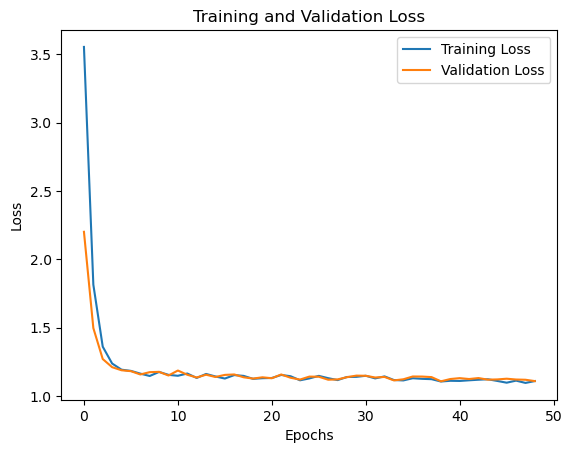

In [7]:
import matplotlib.pyplot as plt

# Przyjmując, że 'history' to zmienna zwrócona przez funkcję fit modelu
# history = model.fit(...)

# Loss

plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig('dataemotions 2.2 loss.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

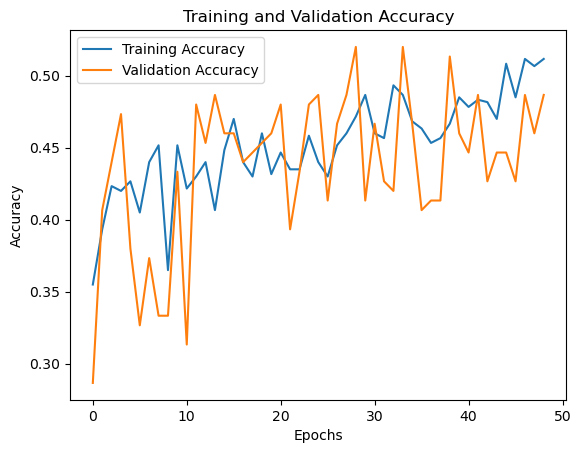

In [8]:
# Accuracy
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('dataemotions 2.2 accuracy.png')
plt.show